### Basic logic
1. Split data into training & testing
2. Oversample training data and train the model
3. Use testing data from original dataset to get the testing data accuracy

# Data Preprocessing

In [1]:
import matplotlib.pylab as pl
import shap
import xgboost
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from functools import reduce
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# print the JS visualization code to the notebook
shap.initjs()

In [2]:
df = pd.read_csv('/Users/jemma/Desktop/LifeBook/table_Parkinson.csv')

In [3]:
df.head()

,SEQN,Gender,Non-Hispanic White,Non-Hispanic Black,Mexican American,Other Hispanic,Non-Hispanic Asian,Other Race - Including Multi-Racial,Walking up ten steps_Some difficulty,Walking up ten steps_No difficulty,...,Trouble sleeping or sleeping too much_Not at all,Trouble sleeping or sleeping too much_More than half the days,Trouble sleeping or sleeping too much_Several days,Trouble sleeping or sleeping too much_Nearly every day,Feeling tired or having little energy_Several days,Feeling tired or having little energy_Not at all,Feeling tired or having little energy_More than half the days,Feeling tired or having little energy_Nearly every day,Rescaled_age,Parkinson
0,83732,1,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0.7,0
1,83732,1,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0.7,0
2,83732,1,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0.7,0
3,83732,1,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0.7,0
4,83732,1,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0.7,0


In [4]:
df = df[df.columns[1:].to_list()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4298 entries, 0 to 4297
Data columns (total 34 columns):
Gender                                                             4298 non-null int64
Non-Hispanic White                                                 4298 non-null int64
Non-Hispanic Black                                                 4298 non-null int64
Mexican American                                                   4298 non-null int64
Other Hispanic                                                     4298 non-null int64
Non-Hispanic Asian                                                 4298 non-null int64
Other Race - Including Multi-Racial                                4298 non-null int64
Walking up ten steps_Some difficulty                               4298 non-null int64
Walking up ten steps_No difficulty                                 4298 non-null int64
Walking up ten steps_Unable to do                                  4298 non-null int64
Walking up ten steps_Mu

In [5]:
X = df[df.columns[0:-1]].values
y = df['Parkinson'].values
print(X.shape)
print(y.shape)

(4298, 33)
(4298,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
dict = {'Parkinson': y_train}
y_train_tb = pd.DataFrame(dict)

In [8]:
X_train_tb = pd.DataFrame(X_train)

In [9]:
Train_data = pd.concat([X_train_tb.reset_index(drop=True),y_train_tb], axis = 1)
Train_data2 = Train_data.reset_index()

In [10]:
Train_data2

,index,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,Parkinson
0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0
1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.950000,0
2,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0
3,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.283333,0
4,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.700000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,3218,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.766667,0
3219,3219,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.533333,0
3220,3220,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.916667,0
3221,3221,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.266667,0


In [11]:
Train_data2.columns

Index([    'index',           0,           1,           2,           3,
                 4,           5,           6,           7,           8,
                 9,          10,          11,          12,          13,
                14,          15,          16,          17,          18,
                19,          20,          21,          22,          23,
                24,          25,          26,          27,          28,
                29,          30,          31,          32, 'Parkinson'],
      dtype='object')

(array([3216.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           7.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

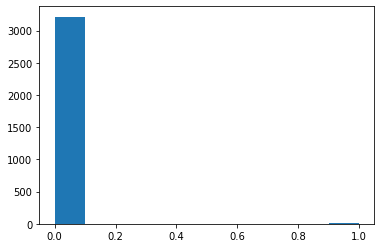

In [12]:
#training data balancing
plt.hist(Train_data2.Parkinson)

In [13]:
# generate special classes for types
count0, count1 = Train_data2.Parkinson.value_counts()
aclass0 = Train_data2[Train_data2.Parkinson==0]
aclass1 = Train_data2[Train_data2.Parkinson==1]
print(count0)
print(count1)

3216
7


(array([7., 0., 0., 0., 0., 0., 0., 0., 0., 7.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

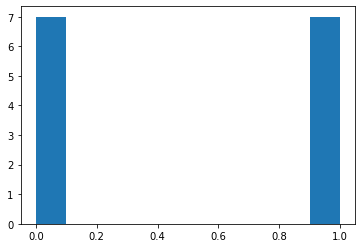

In [14]:
# under sampling
# Generate sample of class 0 types matching number of class 1 types
under0 = aclass0.sample(count1)
alcoholus = pd.concat([under0,aclass1],axis=0)
alcoholus
plt.hist(alcoholus.Parkinson)

3216


(array([3216.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3216.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

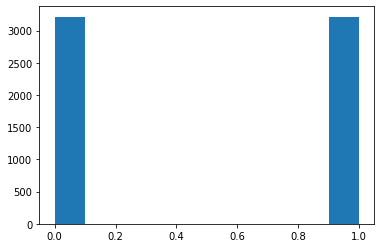

In [15]:
# over sampling 
# Generate a new sample of count0 items of count1
over1 = aclass1.sample(count0,replace=True)
alcoholos_over = pd.concat([aclass0,over1],axis=0)
print(len(over1))
plt.hist(alcoholos_over.Parkinson)

In [16]:
# set up data, and check if balanced
y_train = alcoholos_over.Parkinson.values
X_train = alcoholos_over.iloc[:,:33].values
print(np.mean(y_train))
print(X_train.shape)
print(y_train.shape)

0.5
(6432, 33)
(6432,)


## Logistic Regression Classifier

In [17]:
class LogisticRegressionClassifier:

    def __init__(self, n=100):
        self.n = n

    def fit(self, X, y, random_state=42, criterion='entropy'):
        X_train_p = X[y==1]
        X_train_n = X[y==0]
        y_train_p = y[y==1]
        y_train_n = y[y==0]
        l = sum(y_train_p)
        clf_list = []
        np.random.seed(seed=random_state)
        for i in range(self.n):
            idx_n = np.random.choice(range(X_train_n.shape[0]), l)
            idx_p = np.random.choice(range(X_train_p.shape[0]), l)
            X_train_f = np.concatenate([X_train_n[idx_n, :], X_train_p[idx_p]])
            y_train_f = np.concatenate([y_train_n[idx_n], y_train_p[idx_p]])
            clf = LogisticRegression()
            clf.fit(X_train_f, y_train_f)
            clf_list.append(clf)
            print(f'\rClassifier {i+1} completed.', end='')
        self.clfs = clf_list        
    
    def coefficients(self):
        feature_importance = abs(self.clfs[0].coef_)
        for tree in self.clfs[1:]:
            feature_importance += tree.coef_
        return feature_importance/ self.n
    
    def predict(self, X):
        result_list = list(map(lambda clf: clf.predict_proba(X)[:,1], self.clfs)) # proba of label: y==1
        score = reduce(lambda a, b: a+b, result_list) / len(self.clfs)
        return score
        
    def report(self, X, y):
        y_hat = self.predict(X)
        print(classification_report(y_test, 1.*(y_hat>0.5)))
    
    def predict_proba(self,X):
        result_list = list(map(lambda clf: 100*clf.predict_proba(X)[:,1], self.clfs))
        proba = reduce(lambda a, b: a+b, result_list) / len(self.clfs)
        return proba

In [18]:
btc = LogisticRegressionClassifier(500)
btc.fit(X_train, y_train)
y_hat = 1.0 * (btc.predict(X_test)>0.5)
y_hat_hat = 1.0 * (btc.predict(X_train)>0.5)

Classifier 500 completed.

In [19]:
print(classification_report(y_true=y_train, y_pred=y_hat_hat))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      3216
           1       0.90      1.00      0.95      3216

    accuracy                           0.94      6432
   macro avg       0.95      0.94      0.94      6432
weighted avg       0.95      0.94      0.94      6432



In [20]:
confusion_matrix(y_true=y_train, y_pred=y_hat_hat)

array([[2862,  354],
       [   0, 3216]])

In [21]:
reshaped_X_test = pd.DataFrame(X_test)
reshaped_X_test.index = np.arange(1,len(reshaped_X_test)+1)

In [22]:
btc.fit(X_test, y_test)

Classifier 500 completed.

In [23]:
print(classification_report(y_true=y_test, y_pred=y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1074
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1075
   macro avg       0.50      0.50      0.50      1075
weighted avg       1.00      1.00      1.00      1075



In [24]:
confusion_matrix(y_true=y_test, y_pred=y_hat)

array([[1071,    3],
       [   1,    0]])

In [25]:
btc.coefficients() # avg coefficients of n classifiers 

array([[ 0.13634715, -0.1097995 , -0.03736366,  0.20900138, -0.03740694,
        -0.02202552, -0.00587371, -0.05108994,  0.06181144, -0.00386113,
        -0.01136749, -0.12698854, -0.15531862,  0.18261387, -0.01552613,
        -0.01627625,  0.01032043, -0.01177277, -0.00115181, -0.00190298,
         0.07480119, -0.06711524, -0.00962276, -0.00257031, -0.10947045,
        -0.02217947,  0.17363186, -0.04544988, -0.10558614,  0.18102965,
        -0.03739636, -0.0415151 ,  0.05062968]])

In [26]:
predictors_name = pd.DataFrame(df[df.columns[0:-1]].columns)
predictors_name.loc[predictors_name.index.max() + 1] = "Risk Score"
predictors_name_transpose = predictors_name.transpose()

In [27]:
reshaped_risk_score = pd.DataFrame(btc.predict_proba(X_test).reshape(-1,1))
reshaped_risk_score.index = np.arange(1,len(reshaped_risk_score)+1)
risk_score_tb = pd.concat([reshaped_X_test,reshaped_risk_score], axis=1, ignore_index=True)
risk_score_tb_final = risk_score_tb.rename(columns= predictors_name_transpose.loc[0])
#risk_score_tb_final.to_excel('risk_score_tb_final.xls')

In [28]:
risk_score_tb_final.head()

,Gender,Non-Hispanic White,Non-Hispanic Black,Mexican American,Other Hispanic,Non-Hispanic Asian,Other Race - Including Multi-Racial,Walking up ten steps_Some difficulty,Walking up ten steps_No difficulty,Walking up ten steps_Unable to do,...,Trouble sleeping or sleeping too much_Not at all,Trouble sleeping or sleeping too much_More than half the days,Trouble sleeping or sleeping too much_Several days,Trouble sleeping or sleeping too much_Nearly every day,Feeling tired or having little energy_Several days,Feeling tired or having little energy_Not at all,Feeling tired or having little energy_More than half the days,Feeling tired or having little energy_Nearly every day,Rescaled_age,Risk Score
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.383333,47.518523
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.850000,56.008437
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.766667,59.751612
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.066667,68.378299
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.783333,55.937846


In [29]:
reshaped_cof = pd.DataFrame(btc.coefficients().reshape(-1,1))
predictors_final = pd.DataFrame(df[df.columns[0:-1]].columns)
predictors_final.index = np.arange(1,len(predictors_final)+1)
reshaped_cof.index =  np.arange(1,len(reshaped_cof)+1)

In [30]:
coefficient_tb1= pd.concat([predictors_final,reshaped_cof], axis=1, ignore_index=True)
coefficient_tb2 = coefficient_tb1.rename(columns={0: "Predictor", 1: "Coefficient"})
coefficient_tb_final = coefficient_tb2.sort_values(by=["Coefficient"],ascending=False)
coefficient_tb_final.head(10)
#coefficient_tb_final.to_csv('coefficient_tb_final.csv')

,Predictor,Coefficient
4,Mexican American,0.209001
14,"Feeling down, depressed, or hopeless_Several days",0.182614
30,Feeling tired or having little energy_Not at all,0.181030
27,Trouble sleeping or sleeping too much_Several ...,0.173632
1,Gender,0.136347
21,Difficulty these problems have caused_Not at a...,0.074801
9,Walking up ten steps_No difficulty,0.061811
33,Rescaled_age,0.050630
17,Thought you would be better off dead_Not at all,0.010320
19,Thought you would be better off dead_Nearly ev...,-0.001152


In [31]:
feature_importance = abs(coefficient_tb_final[coefficient_tb_final.columns[1]])
feature_importance = 100.0 * (feature_importance / feature_importance.max())

In [32]:
score = feature_importance.head(10)
predictors_10 = coefficient_tb_final[coefficient_tb_final.columns[0]].head(10)
feature_importance_table = pd.concat([predictors_10,score], axis=1)
feature_importance_table
feature_importance_table_desc = feature_importance_table.sort_values(by=["Coefficient"],ascending=True)
feature_importance_table_desc

,Predictor,Coefficient
19,Thought you would be better off dead_Nearly ev...,0.551100
17,Thought you would be better off dead_Not at all,4.937971
33,Rescaled_age,24.224567
9,Walking up ten steps_No difficulty,29.574654
21,Difficulty these problems have caused_Not at a...,35.789805
1,Gender,65.237439
27,Trouble sleeping or sleeping too much_Several ...,83.076895
30,Feeling tired or having little energy_Not at all,86.616486
14,"Feeling down, depressed, or hopeless_Several days",87.374481
4,Mexican American,100.000000


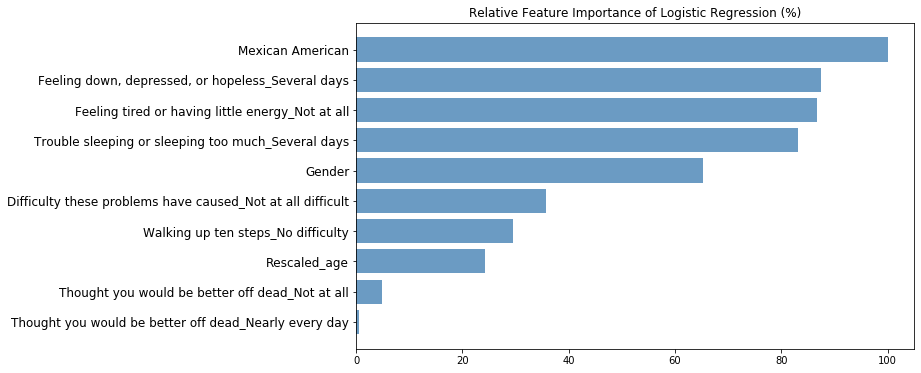

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,6))

share = feature_importance_table_desc[feature_importance_table_desc.columns[1]]
plt.barh(range(10), share, align = 'center',color='steelblue', alpha = 0.8)

plt.yticks(range(10),feature_importance_table_desc[feature_importance_table_desc.columns[0]], fontsize=12)
#ax.set_xlabels('Relative Feature Importance (%)')
#xticks(np.arange(10), ['Tom', 'Dick', 'Sue',]) 
#plt.tight_layout()   
plt.title('Relative Feature Importance of Logistic Regression (%)')
plt.show()

## XGBoost Tree

import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

#### find the best parameter

nmc = 100 

#### set up dictionary for grid search
####  dictionary name must now include pipeline function name then __

n_estimators = 100
max_depth = range(3,10,2)
gamma = [i/10.0 for i in range(0,5)]
min_child_weight = range(1,6,2)

param_grid={'gamma': gamma,'max_depth': max_depth,'min_child_weight': min_child_weight}
#### set up cross-validation shuffles
cvf = ShuffleSplit(test_size=0.2,n_splits=nmc,random_state=25)
#### set up search
grid_search=GridSearchCV(XGBClassifier(),param_grid,cv=cvf,return_train_score=True)
#### implement search
grid_search.fit(X,y)
#### move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_max_depth','param_min_child_weight','param_gamma']])

In [34]:
# use best parameters: max_depth= 3, min_child_weight= 1, gamma=0
from xgboost import XGBClassifier
xgb = XGBClassifier(
 max_depth= 3, 
 min_child_weight= 1,
 gamma=0,
 learning_rate =0.1,
 n_estimators=1000,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1)


xgb.fit(X_train,y_train)
print('Training score:', xgb.score(X_train,y_train))
print('Testing score:',xgb.score(X_test,y_test))

Training score: 1.0
Testing score: 0.9990697674418605


In [35]:
# confusion matrix        
pred = xgb.predict(X_test)
confusion_matrix(y_true=y_test, y_pred=pred)

array([[1074,    0],
       [   1,    0]])

In [36]:
print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1074
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1075
   macro avg       0.50      0.50      0.50      1075
weighted avg       1.00      1.00      1.00      1075



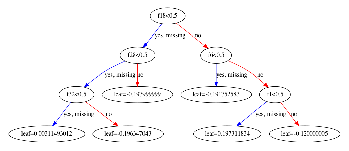

In [37]:
from matplotlib.pylab import rcParams
from xgboost import XGBClassifier
#rcParams['figure.figsize'] = 40,50
tree_num = 0
xgboost.plot_tree(xgb,num_trees=tree_num)

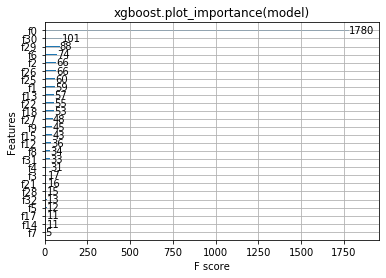

In [38]:
xgboost.plot_importance(xgb)
pl.title("xgboost.plot_importance(model)")
pl.show()

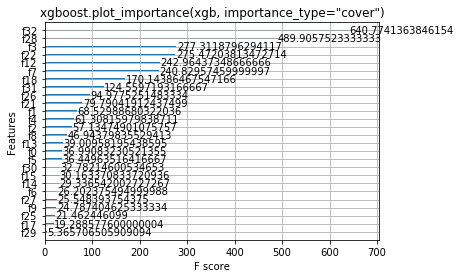

In [39]:
xgboost.plot_importance(xgb, importance_type="cover")
pl.title('xgboost.plot_importance(xgb, importance_type="cover")')
pl.show()

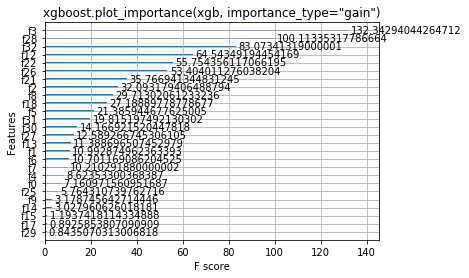

In [40]:
xgboost.plot_importance(xgb, importance_type="gain")
pl.title('xgboost.plot_importance(xgb, importance_type="gain")')
pl.show()

In [41]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)

In [42]:
X_variable = df[df.columns[0:-1]]

In [43]:
shap.force_plot(explainer.expected_value, shap_values[0,:],X_variable.iloc[0,:])

In [44]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_variable.iloc[:1000,:])

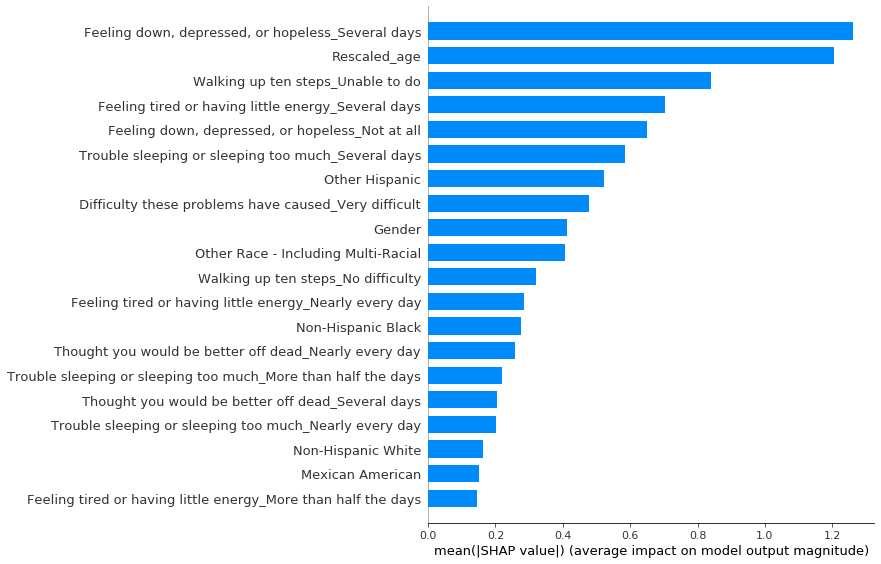

In [45]:
shap.summary_plot(shap_values, X_variable, plot_type="bar")

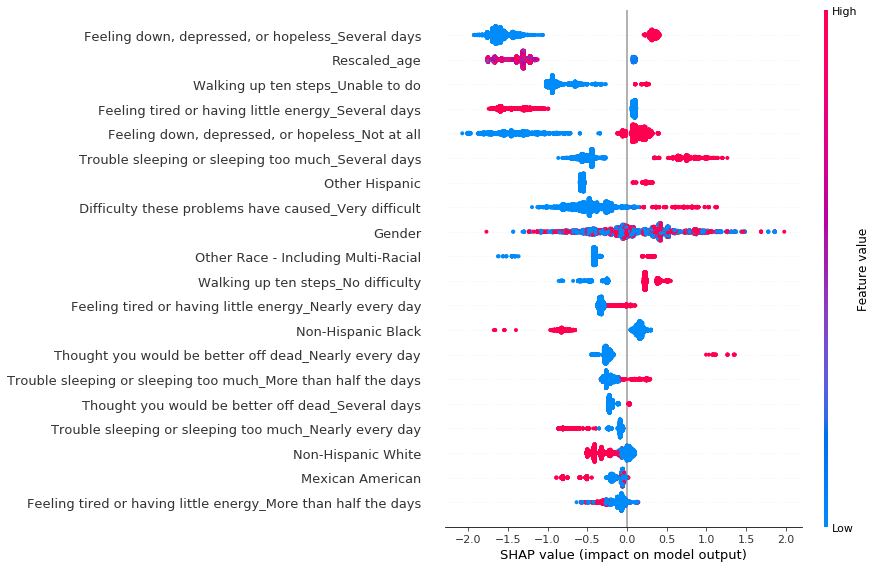

In [47]:
shap.summary_plot(shap_values, X_variable)